In [1]:
import pandas as pd
import numpy as np

In [2]:
X = pd.read_csv("X.csv")
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.484116,-1.034367,-1.072278,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,-0.120914,-0.159061,-0.271538,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,0.333486,-0.632243,-0.292529,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
3,0,-0.616624,0.879357,-0.245745,0,1,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
4,0,-1.112334,-1.037597,-0.955137,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5369,0,0.705269,0.267288,0.514778,1,0,0,1,1,0,...,1,0,1,0,0,1,0,1,0,0
5370,0,-1.442807,0.228529,-1.033569,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
5371,0,0.209559,1.077996,0.619712,0,1,0,1,1,0,...,0,1,0,0,0,1,1,0,0,0
5372,0,-0.079605,0.435243,0.049917,0,1,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0


In [3]:
y = pd.read_csv("y.csv")
y

,Churn
0,No
1,No
2,No
3,No
4,No
...,...
5369,Yes
5370,Yes
5371,Yes
5372,Yes


# MODIFY DATA WITH UNDERSAMPLE

In [4]:
# put back together df
df_both = pd.concat([X, y], axis=1)
df_both

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,-1.484116,-1.034367,-1.072278,1,0,0,1,1,0,...,1,0,0,0,1,0,0,1,0,No
1,0,-0.120914,-0.159061,-0.271538,0,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,No
2,0,0.333486,-0.632243,-0.292529,0,1,1,0,1,0,...,0,1,0,1,0,1,0,0,0,No
3,0,-0.616624,0.879357,-0.245745,0,1,1,0,0,1,...,1,0,0,0,1,0,1,0,0,No
4,0,-1.112334,-1.037597,-0.955137,1,0,1,0,1,0,...,1,0,0,1,0,0,0,0,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5369,0,0.705269,0.267288,0.514778,1,0,0,1,1,0,...,0,1,0,0,1,0,1,0,0,Yes
5370,0,-1.442807,0.228529,-1.033569,1,0,1,0,1,0,...,1,0,0,1,0,0,0,1,0,Yes
5371,0,0.209559,1.077996,0.619712,0,1,0,1,1,0,...,1,0,0,0,1,1,0,0,0,Yes
5372,0,-0.079605,0.435243,0.049917,0,1,1,0,1,0,...,1,0,0,1,0,0,1,0,0,Yes


In [5]:
df_1 = df_both[df_both['Churn'] == 'No'].sample(n=200, random_state=1)
df_2 = df_both[df_both['Churn'] == 'Yes']
df = pd.concat([df_1, df_2]).reset_index(drop=True)
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,-0.038296,1.386453,0.588323,1,0,1,0,1,0,...,0,1,0,0,1,1,0,0,0,No
1,0,1.407524,1.013398,1.786646,0,1,0,1,1,0,...,1,0,0,0,1,1,0,0,0,No
2,0,1.448834,0.551520,1.382195,1,0,0,1,0,1,...,0,0,1,0,1,0,0,1,0,No
3,0,-0.823170,0.230144,-0.608041,1,0,1,0,1,0,...,1,0,0,0,1,0,0,0,1,No
4,0,-1.484116,-1.350899,-1.076498,0,1,1,0,0,1,...,1,0,0,1,0,0,0,0,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,0.705269,0.267288,0.514778,1,0,0,1,1,0,...,0,1,0,0,1,0,1,0,0,Yes
396,0,-1.442807,0.228529,-1.033569,1,0,1,0,1,0,...,1,0,0,1,0,0,0,1,0,Yes
397,0,0.209559,1.077996,0.619712,0,1,0,1,1,0,...,1,0,0,0,1,1,0,0,0,Yes
398,0,-0.079605,0.435243,0.049917,0,1,1,0,1,0,...,1,0,0,1,0,0,1,0,0,Yes


In [6]:
df['Churn'].value_counts()

No     200
Yes    200
Name: Churn, dtype: int64

In [7]:
X = df.drop('Churn', axis=1)
y = df['Churn']

# END OF MODIFYING DATA

In [8]:
# MODEL
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Some functions used before and after the model
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, \
    classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

In [9]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.1, random_state=42)

In [10]:
### UNDERSAMPLE
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [36]:
model = BaggingClassifier(SVC(class_weight="balanced"), n_estimators=10,
                            max_samples=1.0, max_features=0.5, random_state=1)
model.fit(X_train, y_train)
score = model.score(X_val, y_val)
print(score)
y_pred = model.predict(X_val)
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

/Users/nicholas/KapacityTest/KapacityTest_env/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8773234200743495
[[465  54]
 [ 12   7]]
              precision    recall  f1-score   support

          No       0.97      0.90      0.93       519
         Yes       0.11      0.37      0.17        19

    accuracy                           0.88       538
   macro avg       0.54      0.63      0.55       538
weighted avg       0.94      0.88      0.91       538



In [106]:
### UNDERSAMPLE
model = BaggingClassifier(SVC(class_weight="balanced"), n_estimators=10,
                            max_samples=1.0, max_features=0.5, random_state=1)
model.fit(X_train, y_train)
score = model.score(X_val, y_val)
print(score)
y_pred = model.predict(X_val)
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.7
[[34 18]
 [12 36]]
              precision    recall  f1-score   support

          No       0.74      0.65      0.69        52
         Yes       0.67      0.75      0.71        48

    accuracy                           0.70       100
   macro avg       0.70      0.70      0.70       100
weighted avg       0.70      0.70      0.70       100



In [65]:
model = BaggingClassifier(LogisticRegression(class_weight="balanced"), n_estimators=100,
                            max_samples=1.0, max_features=0.5, random_state=1)
model.fit(X_train, y_train)
score = model.score(X_val, y_val)
print(score)
y_pred = model.predict(X_val)
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

/Users/nicholas/KapacityTest/KapacityTest_env/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7472118959107806
[[388 131]
 [  5  14]]
              precision    recall  f1-score   support

          No       0.99      0.75      0.85       519
         Yes       0.10      0.74      0.17        19

    accuracy                           0.75       538
   macro avg       0.54      0.74      0.51       538
weighted avg       0.96      0.75      0.83       538



In [109]:
# UNDERSAMPLE
model = BaggingClassifier(LogisticRegression(class_weight="balanced"), n_estimators=100,
                            max_samples=1.0, max_features=0.5, random_state=1)
model.fit(X_train, y_train)
score = model.score(X_val, y_val)
print(score)
y_pred = model.predict(X_val)
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.71
[[34 18]
 [11 37]]
              precision    recall  f1-score   support

          No       0.76      0.65      0.70        52
         Yes       0.67      0.77      0.72        48

    accuracy                           0.71       100
   macro avg       0.71      0.71      0.71       100
weighted avg       0.72      0.71      0.71       100



In [67]:
y_val

,Churn,PredProbaChurn
410,No,0.112458
5293,Yes,0.312749
2802,No,0.290192
3956,No,0.129082
4576,No,0.047754
...,...,...
144,No,0.108178
5115,No,0.039932
4927,No,0.311044
4995,No,0.563688


In [92]:
dependant_cols = ['gender_Female', 'Partner_No', 'Dependents_No', 'PhoneService_No', 
                  'MultipleLines_No', 'InternetService_No', 'OnlineSecurity_No', 
                  'OnlineBackup_No', 'DeviceProtection_No', 'TechSupport_No', 
                  'StreamingTV_No', 'StreamingMovies_No', 'Contract_Month-to-month', 
                  'PaperlessBilling_No', 'PaymentMethod_Bank transfer (automatic)']

#dependant_cols = []

model = BaggingClassifier(LogisticRegression(class_weight="balanced"), n_estimators=100,
                          max_samples=1.0, max_features=0.5, random_state=1)
model.fit(X_train.drop(dependant_cols, axis=1), y_train["Churn"])
score = model.score(X_val.drop(dependant_cols, axis=1), y_val["Churn"])
print(score)
y_pred = model.predict(X_val.drop(dependant_cols, axis=1))
print(confusion_matrix(y_val["Churn"], y_pred))
print(classification_report(y_val["Churn"], y_pred))

0.7806691449814126
[[406 113]
 [  5  14]]
              precision    recall  f1-score   support

          No       0.99      0.78      0.87       519
         Yes       0.11      0.74      0.19        19

    accuracy                           0.78       538
   macro avg       0.55      0.76      0.53       538
weighted avg       0.96      0.78      0.85       538



In [11]:
# UNDERSAMPLE

dependant_cols = ['gender_Female', 'Partner_No', 'Dependents_No', 'PhoneService_No', 
                  'MultipleLines_No', 'InternetService_No', 'OnlineSecurity_No', 
                  'OnlineBackup_No', 'DeviceProtection_No', 'TechSupport_No', 
                  'StreamingTV_No', 'StreamingMovies_No', 'Contract_Month-to-month', 
                  'PaperlessBilling_No', 'PaymentMethod_Bank transfer (automatic)']

#dependant_cols = []

model = BaggingClassifier(LogisticRegression(class_weight="balanced"), n_estimators=100,
                          max_samples=1.0, max_features=0.5, random_state=1)
model.fit(X_train.drop(dependant_cols, axis=1), y_train)
score = model.score(X_val.drop(dependant_cols, axis=1), y_val)
print(score)
y_pred = model.predict(X_val.drop(dependant_cols, axis=1))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.73
[[35 17]
 [10 38]]
              precision    recall  f1-score   support

          No       0.78      0.67      0.72        52
         Yes       0.69      0.79      0.74        48

    accuracy                           0.73       100
   macro avg       0.73      0.73      0.73       100
weighted avg       0.74      0.73      0.73       100



In [28]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1, 
                               class_weight="balanced_subsample")

model.fit(X_train, y_train)
score = model.score(X_val, y_val)
print(score)
y_pred = model.predict(X_val)
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

/var/folders/vp/cgmv8w951992x0x2_svb9yhc0000gr/T/ipykernel_75530/3141086787.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


0.8271375464684015
[[432  87]
 [  6  13]]
              precision    recall  f1-score   support

          No       0.99      0.83      0.90       519
         Yes       0.13      0.68      0.22        19

    accuracy                           0.83       538
   macro avg       0.56      0.76      0.56       538
weighted avg       0.96      0.83      0.88       538



In [94]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1, 
                               class_weight="balanced_subsample")

model.fit(X_train.drop(dependant_cols, axis=1), y_train["Churn"])
score = model.score(X_val.drop(dependant_cols, axis=1), y_val["Churn"])
print(score)
y_pred = model.predict(X_val.drop(dependant_cols, axis=1))
print(confusion_matrix(y_val["Churn"], y_pred))
print(classification_report(y_val["Churn"], y_pred))

0.8531598513011153
[[447  72]
 [  7  12]]
              precision    recall  f1-score   support

          No       0.98      0.86      0.92       519
         Yes       0.14      0.63      0.23        19

    accuracy                           0.85       538
   macro avg       0.56      0.75      0.58       538
weighted avg       0.95      0.85      0.89       538



In [115]:
# UNDERSAMPLE

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1, 
                               class_weight="balanced_subsample")

model.fit(X_train.drop(dependant_cols, axis=1), y_train)
score = model.score(X_val.drop(dependant_cols, axis=1), y_val)
print(score)
y_pred = model.predict(X_val.drop(dependant_cols, axis=1))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.7
[[33 19]
 [11 37]]
              precision    recall  f1-score   support

          No       0.75      0.63      0.69        52
         Yes       0.66      0.77      0.71        48

    accuracy                           0.70       100
   macro avg       0.71      0.70      0.70       100
weighted avg       0.71      0.70      0.70       100



## Precision-Recall Graph, Threshold and Ransk

In [118]:
pred_proba = model.predict_proba(X_val.drop(dependant_cols, axis=1))
pred_proba

array([[0.14241373, 0.85758627],
       [0.25343109, 0.74656891],
       [0.56162398, 0.43837602],
       [0.79624586, 0.20375414],
       [0.275622  , 0.724378  ],
       [0.77899416, 0.22100584],
       [0.15379288, 0.84620712],
       [0.85963651, 0.14036349],
       [0.19279346, 0.80720654],
       [0.76405785, 0.23594215],
       [0.88152452, 0.11847548],
       [0.46056617, 0.53943383],
       [0.66488995, 0.33511005],
       [0.45571927, 0.54428073],
       [0.6016884 , 0.3983116 ],
       [0.61650241, 0.38349759],
       [0.13023133, 0.86976867],
       [0.3583692 , 0.6416308 ],
       [0.19987154, 0.80012846],
       [0.74409411, 0.25590589],
       [0.76654193, 0.23345807],
       [0.86767373, 0.13232627],
       [0.32353295, 0.67646705],
       [0.44970483, 0.55029517],
       [0.2840811 , 0.7159189 ],
       [0.26587604, 0.73412396],
       [0.86758225, 0.13241775],
       [0.39773484, 0.60226516],
       [0.29141018, 0.70858982],
       [0.20132871, 0.79867129],
       [0.

In [120]:
pred_proba_yes = pred_proba[:,1]
pred_proba_yes

array([0.85758627, 0.74656891, 0.43837602, 0.20375414, 0.724378  ,
       0.22100584, 0.84620712, 0.14036349, 0.80720654, 0.23594215,
       0.11847548, 0.53943383, 0.33511005, 0.54428073, 0.3983116 ,
       0.38349759, 0.86976867, 0.6416308 , 0.80012846, 0.25590589,
       0.23345807, 0.13232627, 0.67646705, 0.55029517, 0.7159189 ,
       0.73412396, 0.13241775, 0.60226516, 0.70858982, 0.79867129,
       0.28522768, 0.14260559, 0.80459769, 0.16796929, 0.77529001,
       0.40403118, 0.15663383, 0.77453323, 0.70835515, 0.18063811,
       0.15814777, 0.25657765, 0.74551671, 0.5899628 , 0.81258213,
       0.63436273, 0.4037537 , 0.16577447, 0.15872024, 0.21593232,
       0.12905077, 0.77483925, 0.72049131, 0.47726845, 0.79922453,
       0.31354576, 0.15070897, 0.64970616, 0.65237483, 0.332304  ,
       0.35277559, 0.77613632, 0.69067812, 0.80674352, 0.39132473,
       0.65327931, 0.72877273, 0.64060062, 0.68145327, 0.07231936,
       0.8362573 , 0.3657355 , 0.25512657, 0.25084009, 0.37226

In [123]:
rank = pd.DataFrame(y_val)
rank['PredProbaYes'] = pred_proba_yes
rank

,Churn,PredProbaYes
209,Yes,0.857586
280,Yes,0.746569
33,No,0.438376
210,Yes,0.203754
93,No,0.724378
...,...,...
314,Yes,0.677790
373,Yes,0.742052
380,Yes,0.684332
239,Yes,0.468417


In [127]:
rank.sort_values("PredProbaYes", ascending=False).head(40)

,Churn,PredProbaYes
246,Yes,0.884675
248,Yes,0.880837
250,Yes,0.872064
278,Yes,0.869769
209,Yes,0.857586
329,Yes,0.846207
369,Yes,0.836948
320,Yes,0.836257
82,No,0.812582
266,Yes,0.807207


[0.52173913 0.51648352 0.52222222 0.51685393 0.52272727 0.52873563
 0.53488372 0.54117647 0.53571429 0.54216867 0.54878049 0.55555556
 0.5625     0.56962025 0.57692308 0.57142857 0.57894737 0.57333333
 0.56756757 0.56164384 0.56944444 0.57746479 0.58571429 0.5942029
 0.60294118 0.6119403  0.60606061 0.61538462 0.625      0.63492063
 0.64516129 0.6557377  0.66666667 0.6779661  0.67241379 0.68421053
 0.67857143 0.69090909 0.68518519 0.69811321 0.71153846 0.7254902
 0.72       0.73469388 0.72916667 0.72340426 0.73913043 0.73333333
 0.75       0.74418605 0.73809524 0.73170732 0.725      0.71794872
 0.73684211 0.75675676 0.77777778 0.77142857 0.76470588 0.75757576
 0.75       0.74193548 0.76666667 0.75862069 0.78571429 0.77777778
 0.80769231 0.8        0.79166667 0.82608696 0.81818182 0.85714286
 0.85       0.84210526 0.83333333 0.82352941 0.8125     0.8
 0.85714286 0.84615385 0.83333333 0.81818182 0.9        0.88888889
 1.         1.         1.         1.         1.         1.
 1.         

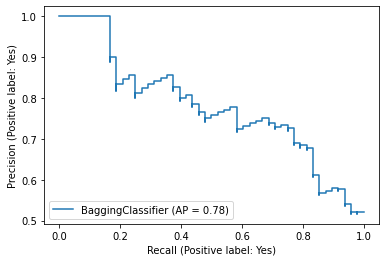

In [128]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve


precision, recall, threshold = precision_recall_curve(np.where(rank["Churn"] == 'Yes', 1, 0), 
                                                      pred_proba_yes)
print(precision, recall, threshold)
disp = plot_precision_recall_curve(model, X_val.drop(dependant_cols, axis=1), rank["Churn"])


In [129]:
THRESHOLD = 0.82
y_pred_thres = np.where(model.predict_proba(X_val.drop(dependant_cols, axis=1))[:,1] > THRESHOLD, 'Yes', 'No')
print(confusion_matrix(y_val, y_pred_thres))
print(classification_report(y_val, y_pred_thres))

[[52  0]
 [40  8]]
              precision    recall  f1-score   support

          No       0.57      1.00      0.72        52
         Yes       1.00      0.17      0.29        48

    accuracy                           0.60       100
   macro avg       0.78      0.58      0.50       100
weighted avg       0.77      0.60      0.51       100



In [130]:
THRESHOLD = 0.30
y_pred_thres = np.where(model.predict_proba(X_val.drop(dependant_cols, axis=1))[:,1] > THRESHOLD, 'Yes', 'No')
print(confusion_matrix(y_val, y_pred_thres))
print(classification_report(y_val, y_pred_thres))

[[20 32]
 [ 5 43]]
              precision    recall  f1-score   support

          No       0.80      0.38      0.52        52
         Yes       0.57      0.90      0.70        48

    accuracy                           0.63       100
   macro avg       0.69      0.64      0.61       100
weighted avg       0.69      0.63      0.61       100



In [133]:
THRESHOLD = 0.55
y_pred_thres = np.where(model.predict_proba(X_val.drop(dependant_cols, axis=1))[:,1] > THRESHOLD, 'Yes', 'No')
print(confusion_matrix(y_val, y_pred_thres))
print(classification_report(y_val, y_pred_thres))

[[39 13]
 [12 36]]
              precision    recall  f1-score   support

          No       0.76      0.75      0.76        52
         Yes       0.73      0.75      0.74        48

    accuracy                           0.75       100
   macro avg       0.75      0.75      0.75       100
weighted avg       0.75      0.75      0.75       100



In [82]:
THRESHOLD = 0.50
y_pred_thres = np.where(model.predict_proba(X_val.drop(dependant_cols, axis=1))[:,1] > THRESHOLD, 'Yes', 'No')
print(confusion_matrix(y_val, y_pred_thres))
print(classification_report(y_val, y_pred_thres))

[[35 17]
 [10 38]]
              precision    recall  f1-score   support

          No       0.78      0.67      0.72        52
         Yes       0.69      0.79      0.74        48

    accuracy                           0.73       100
   macro avg       0.73      0.73      0.73       100
weighted avg       0.74      0.73      0.73       100



In [91]:
L_THRESHOLD = 0.50
H_THRESHOLD = 0.82
y_pred_thres = np.where((model.predict_proba(X_val.drop(dependant_cols, axis=1))[:,1] < H_THRESHOLD) 
                        & (model.predict_proba(X_val.drop(dependant_cols, axis=1))[:,1] > L_THRESHOLD), 'Yes', 'No')
print(confusion_matrix(y_val, y_pred_thres))
print(classification_report(y_val, y_pred_thres))

[[35 17]
 [18 30]]
              precision    recall  f1-score   support

          No       0.66      0.67      0.67        52
         Yes       0.64      0.62      0.63        48

    accuracy                           0.65       100
   macro avg       0.65      0.65      0.65       100
weighted avg       0.65      0.65      0.65       100



In [92]:
L_THRESHOLD = 0.30
H_THRESHOLD = 0.50
y_pred_thres = np.where((model.predict_proba(X_val.drop(dependant_cols, axis=1))[:,1] < H_THRESHOLD) 
                        & (model.predict_proba(X_val.drop(dependant_cols, axis=1))[:,1] > L_THRESHOLD), 'Yes', 'No')
print(confusion_matrix(y_val, y_pred_thres))
print(classification_report(y_val, y_pred_thres))

[[37 15]
 [43  5]]
              precision    recall  f1-score   support

          No       0.46      0.71      0.56        52
         Yes       0.25      0.10      0.15        48

    accuracy                           0.42       100
   macro avg       0.36      0.41      0.35       100
weighted avg       0.36      0.42      0.36       100



## Predicting unseen train examples (the ones drop for undersampling)

In [54]:
# train unseen
df_unseen_1 = df_both.drop(df_1.index, axis = 0)
df_unseen = df_unseen_1.drop(df_2.index, axis = 0)
df_unseen

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,-1.484116,-1.034367,-1.072278,1,0,0,1,1,0,...,1,0,0,0,1,0,0,1,0,No
1,0,-0.120914,-0.159061,-0.271538,0,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,No
2,0,0.333486,-0.632243,-0.292529,0,1,1,0,1,0,...,0,1,0,1,0,1,0,0,0,No
3,0,-0.616624,0.879357,-0.245745,0,1,1,0,0,1,...,1,0,0,0,1,0,1,0,0,No
6,0,-0.988406,-0.385155,-0.832183,0,1,0,1,0,1,...,1,0,0,0,1,0,0,0,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5168,0,-1.029716,-0.039554,-0.765076,1,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,No
5169,0,1.448834,-1.315370,-0.473956,1,0,1,0,1,0,...,0,0,1,0,1,1,0,0,0,No
5171,0,1.448834,1.334774,2.085236,1,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,No
5172,0,-1.071025,-1.042442,-0.935954,1,0,0,1,0,1,...,1,0,0,0,1,0,0,1,0,No


In [55]:
X_unseen = df_unseen.drop("Churn", axis = 1)
y_unseen = df_unseen["Churn"]

In [56]:
X_unseen["PredChurn"] = model.predict(X_unseen.drop(dependant_cols, axis=1))

In [57]:
X_unseen["PredProba"] = model.predict_proba(X_unseen.drop(dependant_cols+["PredChurn"], axis=1))[:,1]

In [90]:
X_unseen

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PredChurn,PredProba
0,0,-1.484116,-1.034367,-1.072278,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,Yes,0.665051
1,0,-0.120914,-0.159061,-0.271538,0,1,1,0,1,0,...,1,0,1,0,0,0,0,1,No,0.203016
2,0,0.333486,-0.632243,-0.292529,0,1,1,0,1,0,...,1,0,1,0,1,0,0,0,No,0.202676
3,0,-0.616624,0.879357,-0.245745,0,1,1,0,0,1,...,0,0,0,1,0,1,0,0,Yes,0.634748
6,0,-0.988406,-0.385155,-0.832183,0,1,0,1,0,1,...,0,0,0,1,0,0,0,1,No,0.301927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5168,0,-1.029716,-0.039554,-0.765076,1,0,1,0,1,0,...,1,0,1,0,0,0,1,0,Yes,0.670469
5169,0,1.448834,-1.315370,-0.473956,1,0,1,0,1,0,...,0,1,0,1,1,0,0,0,No,0.125615
5171,0,1.448834,1.334774,2.085236,1,0,0,1,0,1,...,1,0,0,1,0,1,0,0,No,0.315128
5172,0,-1.071025,-1.042442,-0.935954,1,0,0,1,0,1,...,0,0,0,1,0,0,1,0,No,0.452298


In [66]:
unseen_churn = X_unseen[X_unseen["PredChurn"]=="Yes"]
unseen_churn = unseen_churn.drop("PredChurn", axis = 1)

In [67]:
unseen_churn.mean()

SeniorCitizen                              0.280960
tenure                                    -0.588424
MonthlyCharges                             0.558476
TotalCharges                              -0.214966
gender_Female                              0.489164
gender_Male                                0.510836
Partner_No                                 0.632353
Partner_Yes                                0.367647
Dependents_No                              0.845975
Dependents_Yes                             0.154025
PhoneService_No                            0.087461
PhoneService_Yes                           0.912539
MultipleLines_No                           0.452786
MultipleLines_Yes                          0.459752
InternetService_DSL                        0.271672
InternetService_Fiber optic                0.717492
InternetService_No                         0.010836
OnlineSecurity_No                          0.811146
OnlineSecurity_Yes                         0.178019
OnlineBackup

Combining with an offer.

In [69]:
unseen_churn[unseen_churn["PaymentMethod_Electronic check"]==1]

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PredProba
0,0,-1.484116,-1.034367,-1.072278,1,0,0,1,1,0,...,1,0,0,0,1,0,0,1,0,0.665051
9,0,-0.492697,1.409062,0.071446,0,1,1,0,1,0,...,1,0,0,0,1,0,0,1,0,0.736105
13,0,-0.657933,0.910041,-0.282991,1,0,1,0,1,0,...,1,0,0,0,1,0,0,1,0,0.793613
30,0,-0.988406,0.462698,-0.662532,1,0,0,1,1,0,...,1,0,0,0,1,0,0,1,0,0.584933
31,0,0.498723,0.730781,0.597042,1,0,1,0,1,0,...,1,0,0,0,1,0,0,1,0,0.603303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5153,0,-1.484116,-0.385155,-1.063623,1,0,1,0,1,0,...,1,0,0,1,0,0,0,1,0,0.612037
5157,0,1.448834,1.391298,2.163344,0,1,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0.548489
5158,1,1.077051,1.344464,1.704812,1,0,0,1,1,0,...,1,0,0,0,1,0,0,1,0,0.729638
5163,1,-1.277570,-0.564415,-0.971865,1,0,1,0,1,0,...,1,0,0,0,1,0,0,1,0,0.836133


In [70]:
X_unseen[X_unseen["PaymentMethod_Electronic check"]==1]

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PredChurn,PredProba
0,0,-1.484116,-1.034367,-1.072278,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,Yes,0.665051
9,0,-0.492697,1.409062,0.071446,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,Yes,0.736105
13,0,-0.657933,0.910041,-0.282991,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,Yes,0.793613
30,0,-0.988406,0.462698,-0.662532,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,Yes,0.584933
31,0,0.498723,0.730781,0.597042,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,Yes,0.603303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5157,0,1.448834,1.391298,2.163344,0,1,1,0,1,0,...,1,0,0,1,0,0,1,0,Yes,0.548489
5158,1,1.077051,1.344464,1.704812,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,Yes,0.729638
5163,1,-1.277570,-0.564415,-0.971865,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,Yes,0.836133
5168,0,-1.029716,-0.039554,-0.765076,1,0,1,0,1,0,...,1,0,1,0,0,0,1,0,Yes,0.670469


In [81]:
np.where(X_unseen[X_unseen["PaymentMethod_Electronic check"]==1]["PredChurn"] == "Yes", 1, 0).sum()

791

Above is for 70% accuracy and 80% recall. This means that 70% of these 791 will churn, but 20% of peple who will churn are not reached.

Below is for 100% accuracy and 17% recall. This means, model is sure that these 110 will churn, but 93% of other churners are not reached.  ==>  Big offer. Certainty, low cast (only 110 persons)

After is for 57% accuracy and 90% recall. This means that 90% of all chruners are reached when taking to these 1105 (1105/4974 = 22% of all unseen), but 43% will not churn.  

Last, removing the 100% accuracy ones from the 90% recall.  ==>  Smaller offer for those 995 (1105-110) ............OU MEILLEUR AVEC LE PREMIER?? (THRESHOLD À .50)

In [74]:
X_unseen[(X_unseen["PredProba"] > 0.82) & (X_unseen["PaymentMethod_Electronic check"]==1)]

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PredChurn,PredProba
205,1,-0.699242,1.459126,-0.149875,0,1,0,1,1,0,...,0,0,1,0,0,0,1,0,Yes,0.840328
217,1,-1.277570,0.887431,-0.840644,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,Yes,0.905738
221,1,-0.079605,1.257256,0.395011,0,1,0,1,1,0,...,0,0,0,1,0,0,1,0,Yes,0.852810
256,1,-1.484116,0.330271,-1.054086,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,Yes,0.850487
262,1,-1.236261,0.880971,-0.837824,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,Yes,0.903819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4926,0,-1.318880,1.119985,-0.869795,0,1,1,0,1,0,...,0,0,1,0,0,0,1,0,Yes,0.840291
4943,0,-1.071025,0.882586,-0.658721,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,Yes,0.852319
5029,1,-1.277570,0.575745,-0.870871,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,Yes,0.877274
5080,0,-1.153643,0.763080,-0.744236,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,Yes,0.848692


In [76]:
X_unseen[(X_unseen["PredProba"] > 0.30) & (X_unseen["PaymentMethod_Electronic check"]==1)]

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PredChurn,PredProba
0,0,-1.484116,-1.034367,-1.072278,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,Yes,0.665051
9,0,-0.492697,1.409062,0.071446,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,Yes,0.736105
13,0,-0.657933,0.910041,-0.282991,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,Yes,0.793613
30,0,-0.988406,0.462698,-0.662532,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,Yes,0.584933
31,0,0.498723,0.730781,0.597042,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,Yes,0.603303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5157,0,1.448834,1.391298,2.163344,0,1,1,0,1,0,...,1,0,0,1,0,0,1,0,Yes,0.548489
5158,1,1.077051,1.344464,1.704812,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,Yes,0.729638
5163,1,-1.277570,-0.564415,-0.971865,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,Yes,0.836133
5168,0,-1.029716,-0.039554,-0.765076,1,0,1,0,1,0,...,1,0,1,0,0,0,1,0,Yes,0.670469


In [89]:
X_unseen[(X_unseen["PredProba"] > 0.30) & (X_unseen["PredProba"] < 0.82) & (X_unseen["PaymentMethod_Electronic check"]==1)]

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PredChurn,PredProba
0,0,-1.484116,-1.034367,-1.072278,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,Yes,0.665051
9,0,-0.492697,1.409062,0.071446,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,Yes,0.736105
13,0,-0.657933,0.910041,-0.282991,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,Yes,0.793613
30,0,-0.988406,0.462698,-0.662532,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,Yes,0.584933
31,0,0.498723,0.730781,0.597042,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,Yes,0.603303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5156,0,-1.029716,-1.378353,-0.982221,0,1,0,1,0,1,...,0,0,0,1,0,0,1,0,No,0.409066
5157,0,1.448834,1.391298,2.163344,0,1,1,0,1,0,...,1,0,0,1,0,0,1,0,Yes,0.548489
5158,1,1.077051,1.344464,1.704812,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,Yes,0.729638
5168,0,-1.029716,-0.039554,-0.765076,1,0,1,0,1,0,...,1,0,1,0,0,0,1,0,Yes,0.670469


In [77]:
X_unseen[(X_unseen["PredProba"] > 0) & (X_unseen["PaymentMethod_Electronic check"]==1)]

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PredChurn,PredProba
0,0,-1.484116,-1.034367,-1.072278,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,Yes,0.665051
9,0,-0.492697,1.409062,0.071446,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,Yes,0.736105
13,0,-0.657933,0.910041,-0.282991,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,Yes,0.793613
30,0,-0.988406,0.462698,-0.662532,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,Yes,0.584933
31,0,0.498723,0.730781,0.597042,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,Yes,0.603303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5157,0,1.448834,1.391298,2.163344,0,1,1,0,1,0,...,1,0,0,1,0,0,1,0,Yes,0.548489
5158,1,1.077051,1.344464,1.704812,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,Yes,0.729638
5163,1,-1.277570,-0.564415,-0.971865,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,Yes,0.836133
5168,0,-1.029716,-0.039554,-0.765076,1,0,1,0,1,0,...,1,0,1,0,0,0,1,0,Yes,0.670469
